# Import Libraries and Set Paths

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from scipy.stats import skew, kurtosis

# Plotting config
%matplotlib inline
sns.set(color_codes=True)
sns.set(font_scale=1)

%load_ext autoreload
%autoreload 2

DATA_DIR = './data'

# Load Data

In [2]:
# Load data
trainpath = os.path.join(DATA_DIR, 'train.csv')
train = pd.read_csv(trainpath)
testpath = os.path.join(DATA_DIR, 'test.csv')
test = pd.read_csv(testpath)

# Preview Data

In [3]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.get_dtype_counts(),"\n")
print("---------------------------------------")
print(train.info())

float64     3
int64      35
object     43
dtype: int64 

---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofSt

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Percentage of NA's in Columns

In [7]:
# Normally, if the property has more 20% information loss, we should delete it. [1]
nans = pd.concat([train.isnull().sum(), train.isnull().sum() / train.shape[0], 
                  test.isnull().sum(), test.isnull().sum() / test.shape[0]], axis=1,
                  keys=['Train', 'Percentage', 'Test', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])
# We should delete Alley, Fence, FireplaceQu, MiscFeature, PoolQC

              Train  Percentage    Test  Percentage
Alley          1369    0.937671  1352.0    0.926662
BsmtCond         37    0.025342    45.0    0.030843
BsmtExposure     38    0.026027    44.0    0.030158
BsmtFinSF1        0    0.000000     1.0    0.000685
BsmtFinSF2        0    0.000000     1.0    0.000685
BsmtFinType1     37    0.025342    42.0    0.028787
BsmtFinType2     38    0.026027    42.0    0.028787
BsmtFullBath      0    0.000000     2.0    0.001371
BsmtHalfBath      0    0.000000     2.0    0.001371
BsmtQual         37    0.025342    44.0    0.030158
BsmtUnfSF         0    0.000000     1.0    0.000685
Electrical        1    0.000685     0.0    0.000000
Exterior1st       0    0.000000     1.0    0.000685
Exterior2nd       0    0.000000     1.0    0.000685
Fence          1179    0.807534  1169.0    0.801234
FireplaceQu     690    0.472603   730.0    0.500343
Functional        0    0.000000     2.0    0.001371
GarageArea        0    0.000000     1.0    0.000685
GarageCars  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


# Multivariate Analysis

(LotFrontage, LotArea) Corr: 0.306795
(LotFrontage, SqrtLotArea) Corr: 0.476837


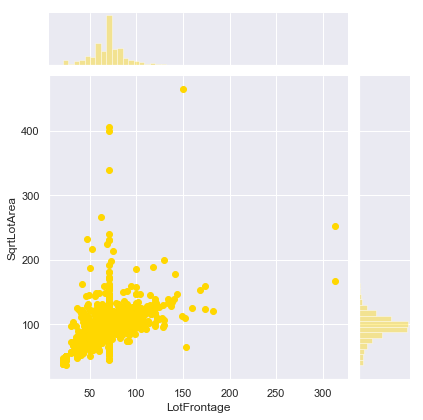

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
corr = train['LotFrontage'].corr(train['LotArea'])
print("(LotFrontage, LotArea) Corr: %.6f" % corr)

# 0.42609501877180816 isn't great, maybe try a polynomial expression
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
test['SqrtLotArea'] = np.sqrt(test['LotArea'])
corr = train['LotFrontage'].corr(train['SqrtLotArea'])
print("(LotFrontage, SqrtLotArea) Corr: %.6f" % corr)

sns.jointplot(train['LotFrontage'], train['SqrtLotArea'], color='gold')
plt.show()

filter = train['LotFrontage'].isnull()
train.LotFrontage[filter] = train.SqrtLotArea[filter]

filter = test['LotFrontage'].isnull()
test.LotFrontage[filter] = test.SqrtLotArea[filter]

### Correlation

In [8]:
corrSalePrice = train.corr()["SalePrice"]
corrSalePrice[np.argsort(corrSalePrice)][::-1]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

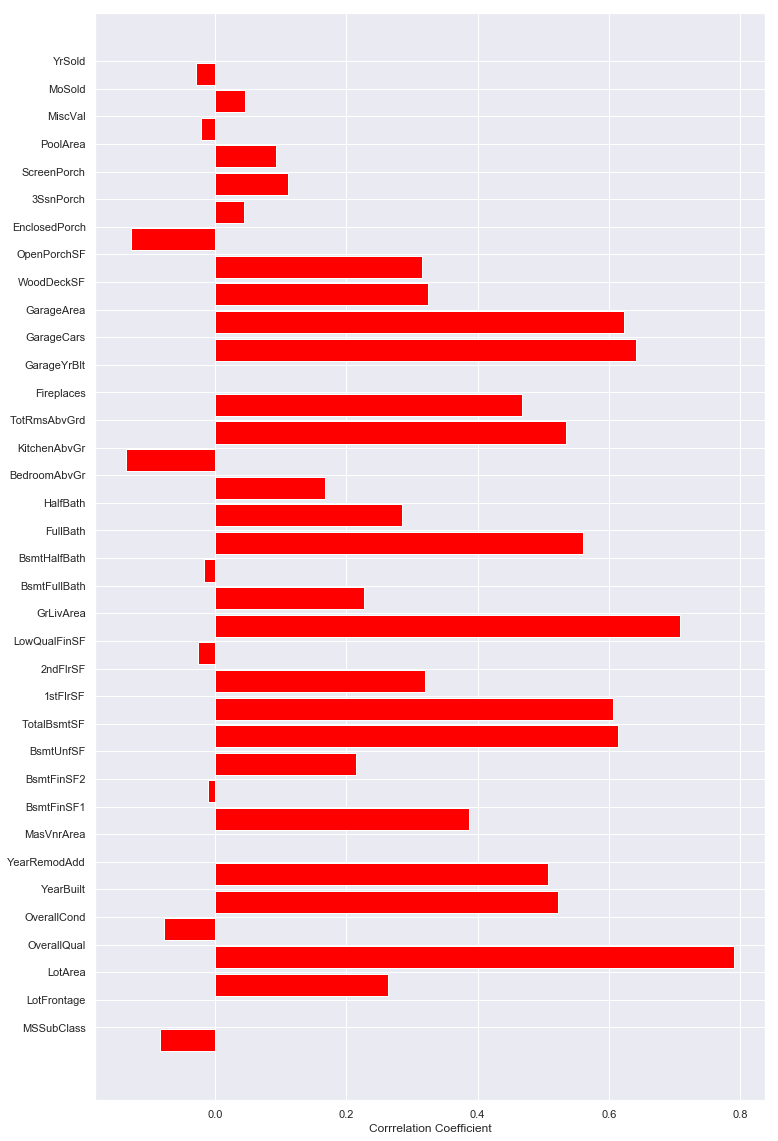

In [9]:
num_feat = train.columns[train.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train['SalePrice'].values)[0, 1])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 20))
ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+(width/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Corrrelation Coefficient")
plt.show()

In [10]:
corr = train.corr()
corr = corr.iloc[:-1,:-1] # Get rid of SalePrice row and col

thresh = 0.5
importantcorrs = corr[abs(corr) > thresh][corr != 1.0].unstack().dropna().to_dict()
pairs = set([(tuple(sorted(attr)), importantcorrs[attr]) for attr in importantcorrs])
pairs = pd.DataFrame(list(pairs), columns=['Feature Pair', 'Correlation'])
pairs.sort_values(by='Correlation', ascending=False)

,Feature Pair,Correlation
21,"(GarageArea, GarageCars)",0.882475
22,"(GarageYrBlt, YearBuilt)",0.825667
2,"(GrLivArea, TotRmsAbvGrd)",0.825489
18,"(1stFlrSF, TotalBsmtSF)",0.819530
0,"(2ndFlrSF, GrLivArea)",0.687501
6,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
24,"(BsmtFinSF1, BsmtFullBath)",0.649212
14,"(GarageYrBlt, YearRemodAdd)",0.642277
19,"(FullBath, GrLivArea)",0.630012
9,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


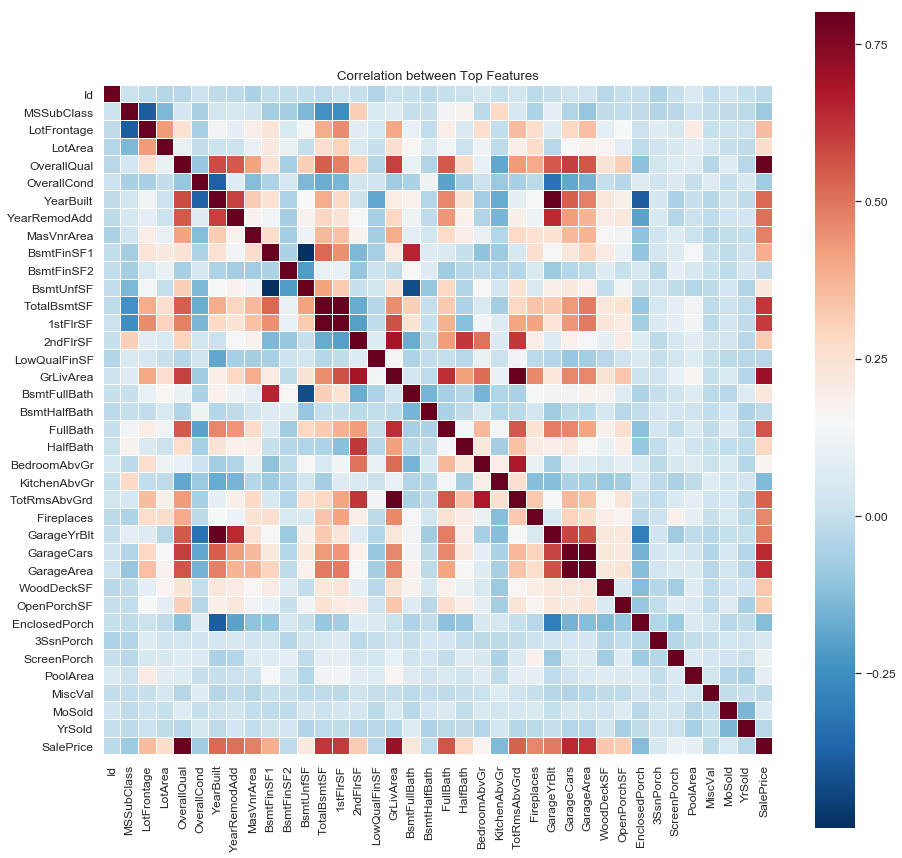

In [11]:
# corrMat = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
#                       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
#                       'YearRemodAdd', 'GarageYrBlt']].corr()
corrMat = train.corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(15,15))

sns.heatmap(corrMat, vmax=0.8, linewidths=0.01, 
            square=True, cmap='RdBu_r', linecolor='white')
plt.title('Correlation between Top Features')
plt.show()

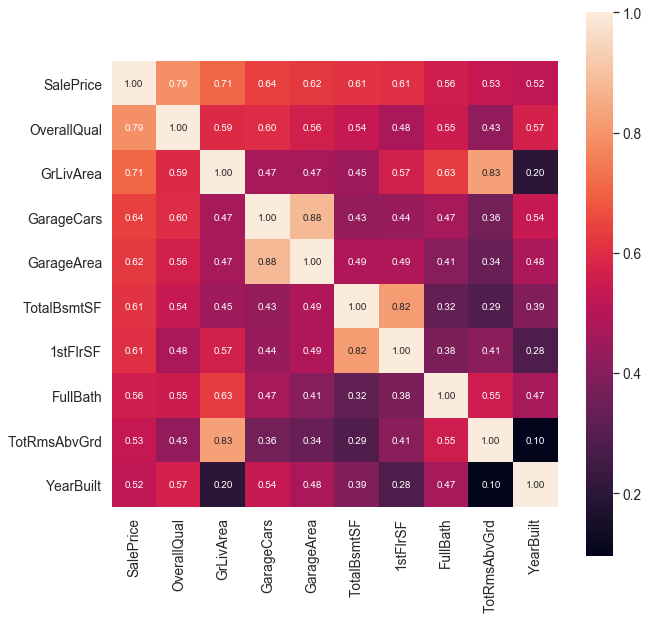

In [12]:
cols = corrMat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# High multicollinearity between (1stFlrSF, TotalBsmtSF), (GarageCars, GarageArea), 
# and (GrLivArea, TotRmsAbvGrd)
# Low correlation between (GrLivArea, SalePrice), (TotRmsAbvGrd)

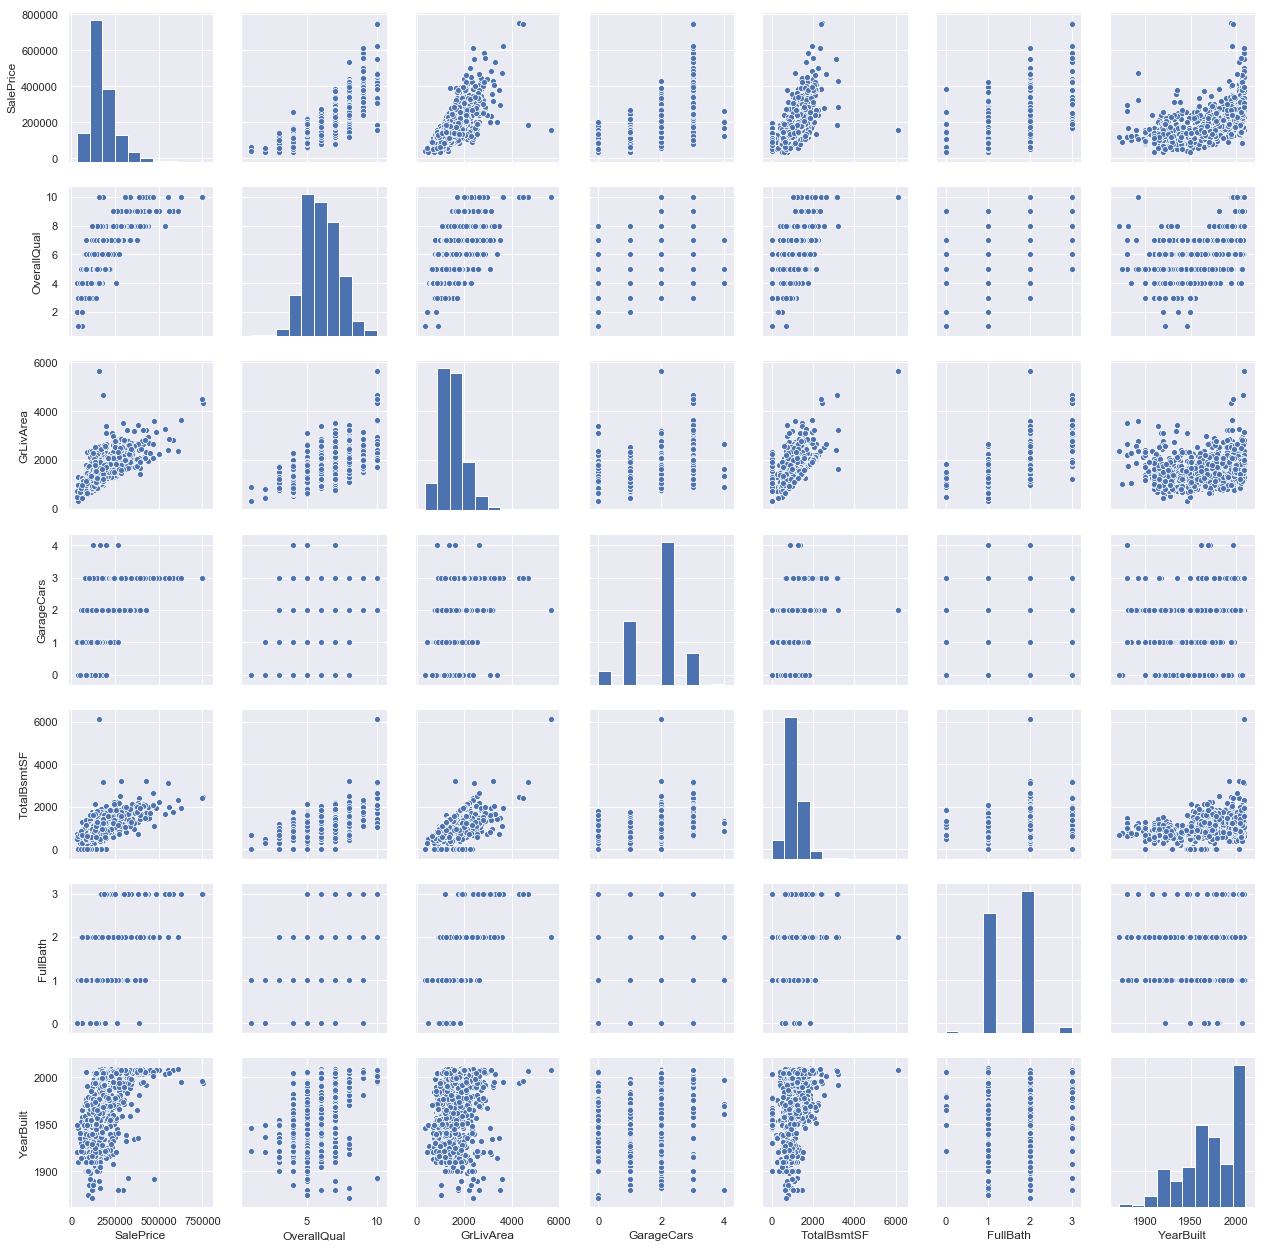

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
        'FullBath', 'YearBuilt']
sns.pairplot(train[cols]);

# Univariate Analysis

#### OverallQual

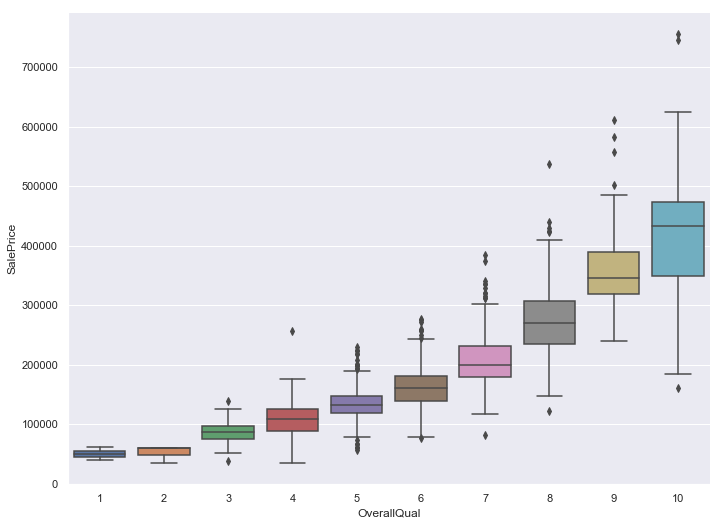

In [14]:
# OverallQual

qualvSP = sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=train)
qualvSP.fig.set_figheight(8)
qualvSP.fig.set_figwidth(12)
plt.show()
# Linear relationship

#### YearBuilt

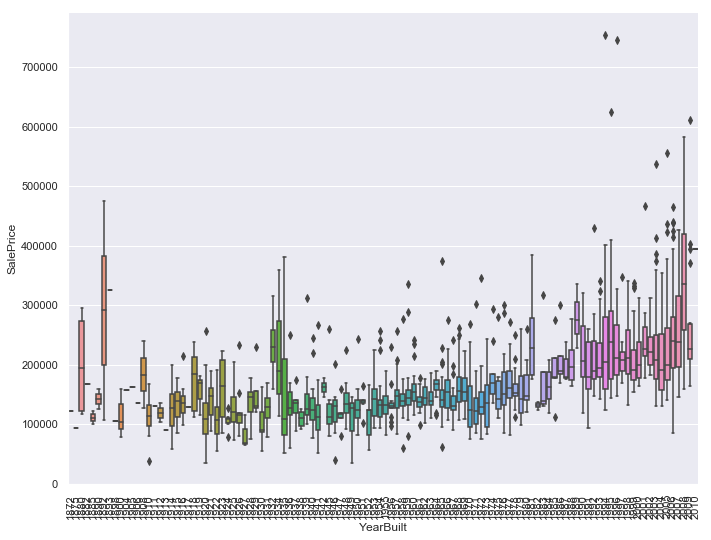

In [15]:
yearBuiltvSP = sns.catplot(x="YearBuilt", y="SalePrice", kind="box", data=train)
yearBuiltvSP.fig.set_figheight(8)
yearBuiltvSP.fig.set_figwidth(12)
plt.xticks(rotation=90)
plt.show()
# Generally linear relationship

#### KitchenQual

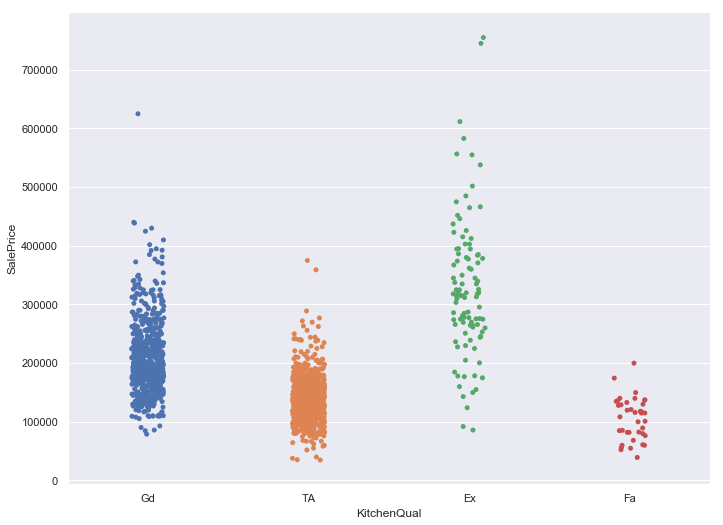

In [16]:
KitchenvSP = sns.catplot(x="KitchenQual", y="SalePrice", data=train)
KitchenvSP.fig.set_figheight(8)
KitchenvSP.fig.set_figwidth(12)
plt.show()

#### MSSubClass

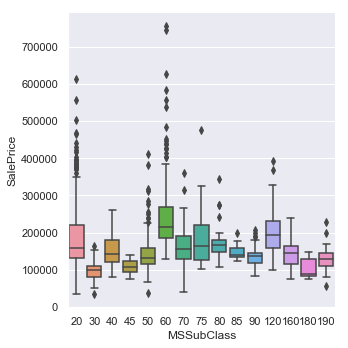

In [17]:
sns.catplot(x='MSSubClass',y='SalePrice', data=train, kind='box');

#### Condition Variables

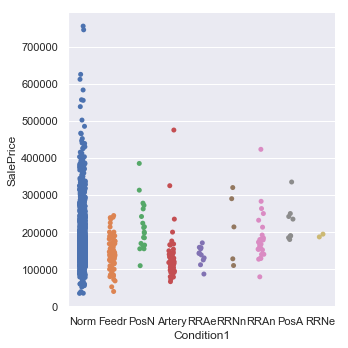

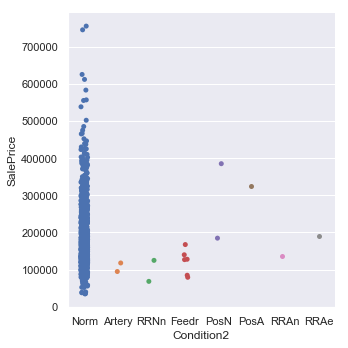

In [18]:
sns.catplot(x='Condition1', y='SalePrice', data=train)
sns.catplot(x='Condition2', y='SalePrice', data=train)

#### LandContour

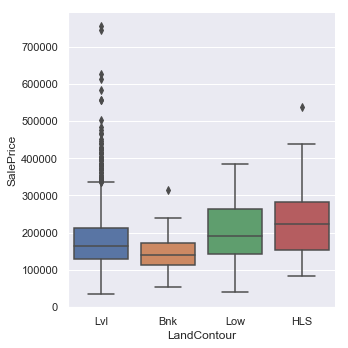

In [19]:
sns.catplot(x='LandContour', y='SalePrice', kind='box', data=train);

#### MSZoning

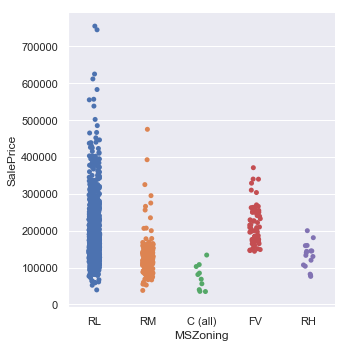

In [20]:
sns.catplot('MSZoning', 'SalePrice', data=train);

#### YearBuilt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


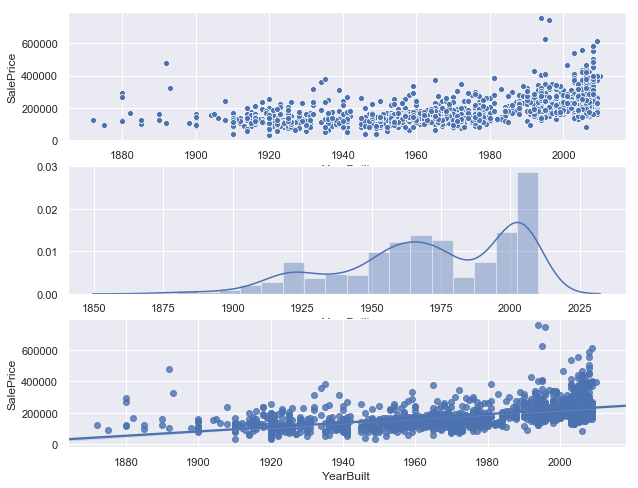

In [21]:
fig, axs = plt.subplots(3, figsize=(10,8))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, ax=axs[0]);
sns.distplot(train['YearBuilt'], ax=axs[1]);
sns.regplot(x='YearBuilt', y='SalePrice', data=train, ax=axs[2]);

In [22]:
# # Seeing if binning works -- update: it doesn't
# bins = [0, 1950, 1975, 2020]
# labels = ['Before 1950', '1950-1975', 'After 1975']

# train['YearBuilt'] = pd.cut(train['YearBuilt'], bins=bins, labels=labels)
# sns.catplot(x='YearBuilt', y='SalePrice', data=train, kind="box");

In [23]:
# from scipy.stats import f_oneway
# temp = {}
# for i in range(len(labels)):
#     sp = train[train['YearBuilt'] == labels[i]]['SalePrice']
#     temp[labels[i]] = sp
    
# anova = f_oneway(temp['Before 1950'], temp['1950-1975'], temp['After 1975'])
# anova.pvalue

#### Street

p-value: 0.1150


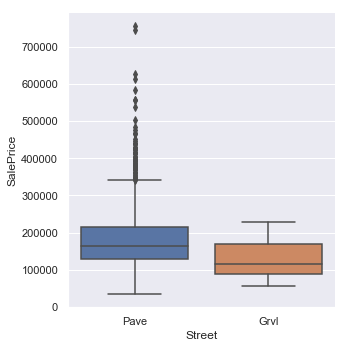

In [24]:
from scipy.stats import ttest_ind

# Welch's t-test for unequal variances to see if there's a significant difference 
# in means between pave and grvl
pave = train[train['Street'] == 'Pave']['SalePrice']
grvl = train[train['Street'] == 'Grvl']['SalePrice']
t = ttest_ind(pave, grvl, equal_var=False)
print('p-value: %.4f' % t.pvalue)

sns.catplot('Street', 'SalePrice', data=train, kind="box");

#### Roofing Variables

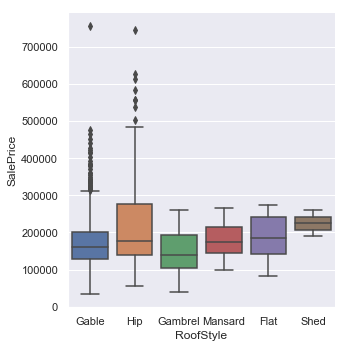

In [25]:
sns.catplot(x='RoofStyle', y='SalePrice', data=train, kind="box");
# Looks promising

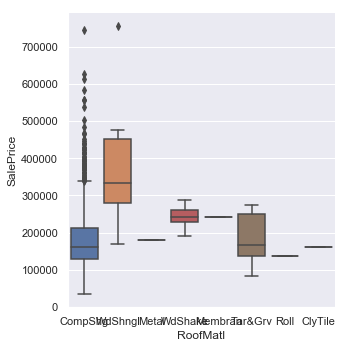

In [26]:
sns.catplot(x='RoofMatl', y='SalePrice', data=train, kind="box");
# Low variance

#### Heating

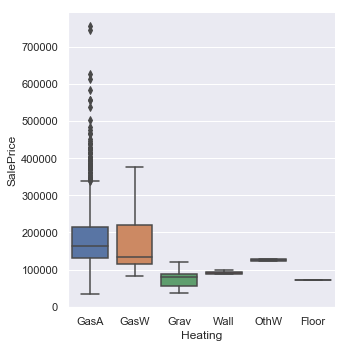

In [27]:
sns.catplot('Heating', 'SalePrice', data=train, kind="box");
# Low variance

#### LowQualFinSF

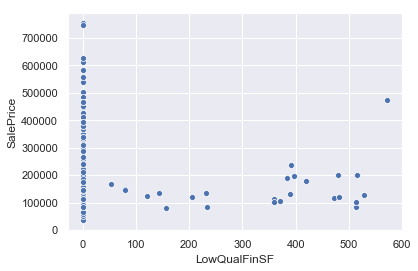

In [28]:
sns.scatterplot('LowQualFinSF', 'SalePrice', data=train);
# Low variance

#### WoodDeckSF

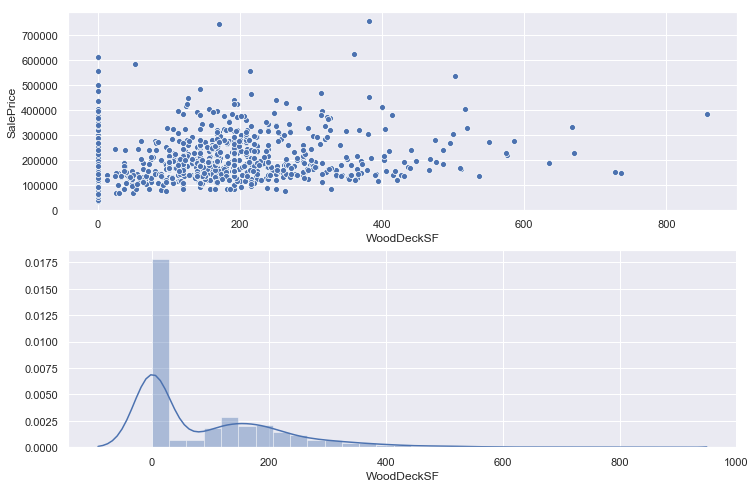

In [29]:
fig, axs = plt.subplots(2,1,figsize=(12,8))

sns.scatterplot('WoodDeckSF', 'SalePrice', data=train, ax=axs[0]);
sns.distplot(train['WoodDeckSF'], ax=axs[1]);

#### SaleType

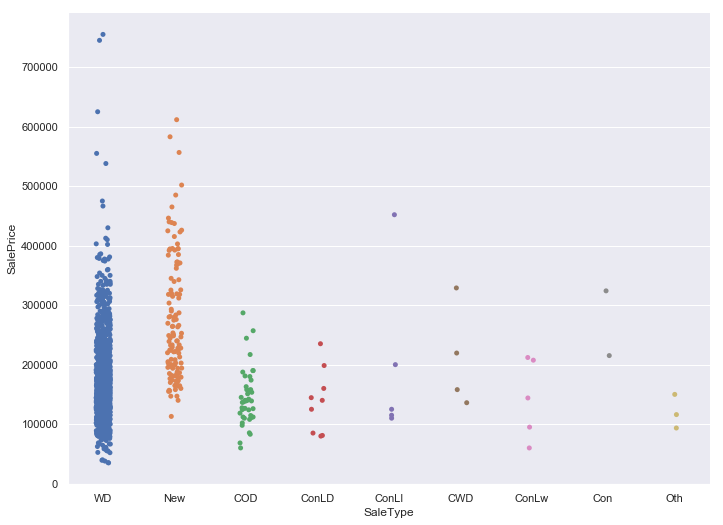

In [30]:
STvSP = sns.catplot(x="SaleType", y="SalePrice", data=train)
STvSP.fig.set_figheight(8)
STvSP.fig.set_figwidth(12)
plt.show()

#### Exterior Variables

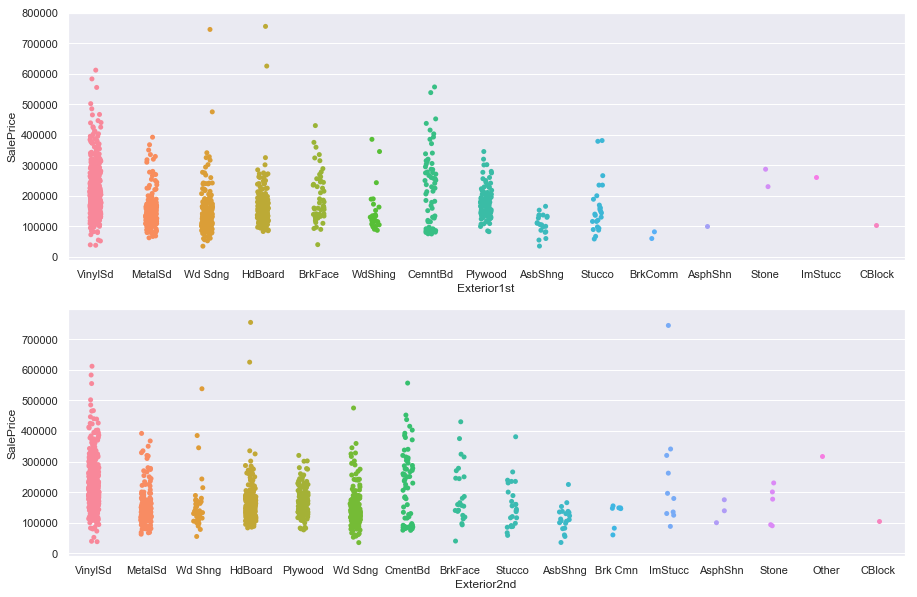

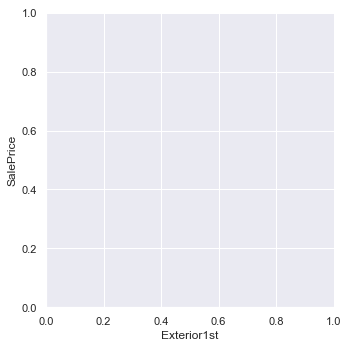

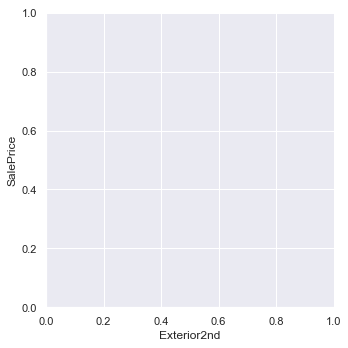

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

Ext1stvSP = sns.catplot(x="Exterior1st", y="SalePrice", data=train, ax=axs[0])
Ext2ndvSP = sns.catplot(x="Exterior2nd", y="SalePrice", data=train, ax=axs[1])
plt.show()

#### Utilities

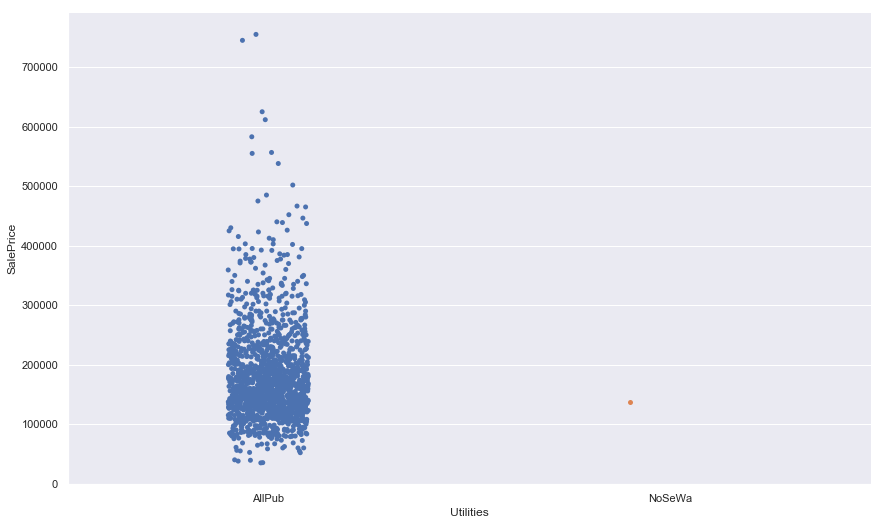

In [32]:
UtilvSP = sns.catplot(x="Utilities", y="SalePrice", data=train)
UtilvSP.fig.set_figheight(8)
UtilvSP.fig.set_figwidth(15)
plt.show()
# Super low variance, so let's drop

#### Electrical

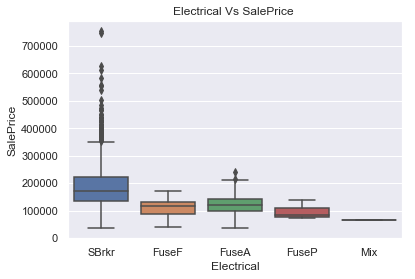

In [33]:
# Electrical
sns.boxplot('Electrical', 'SalePrice', data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

# We can replace missing values with the most frequent ones.
train['Electrical'] = train['Electrical'].fillna(train['MSZoning'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['MSZoning'].mode()[0])

#### PoolArea

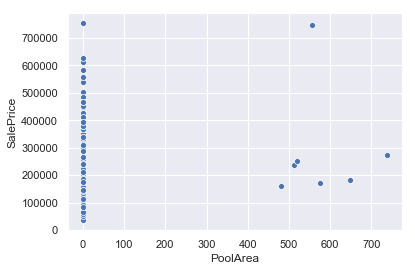

In [34]:
sns.scatterplot(x="PoolArea", y="SalePrice", data=train);
# Little predictive value from this

#### OpenPorchSF

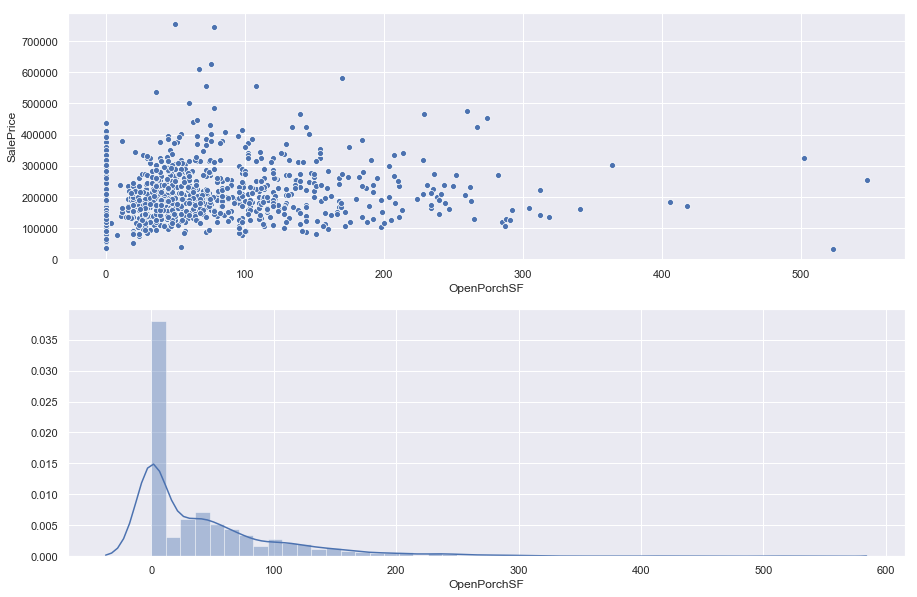

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
sns.scatterplot(x="OpenPorchSF", y="SalePrice", data=train, ax=axs[0])
sns.distplot(train["OpenPorchSF"], ax=axs[1])
plt.show()
# Too many zeros still

#### FullBath

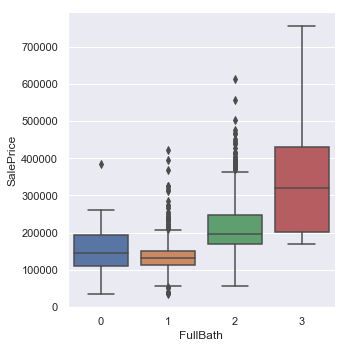

In [36]:
sns.catplot('FullBath', 'SalePrice', data=train, kind="box");

#### TotalBsmtSF

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


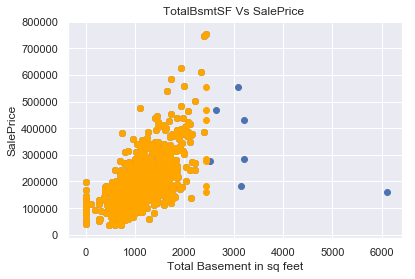

In [37]:
# Basement Features
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], 
            data=train)
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

# There are a few outliers in TotalBsmtSF - let's remove
upperlimit = np.percentile(train.TotalBsmtSF.values, 99.5)
train['TotalBsmtSF'].ix[train['TotalBsmtSF'] > upperlimit] = upperlimit
plt.scatter(train['TotalBsmtSF'], train['SalePrice'].values, color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

#### TotalBsmtSF, 1stFlrSF, 2ndFlrSF

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


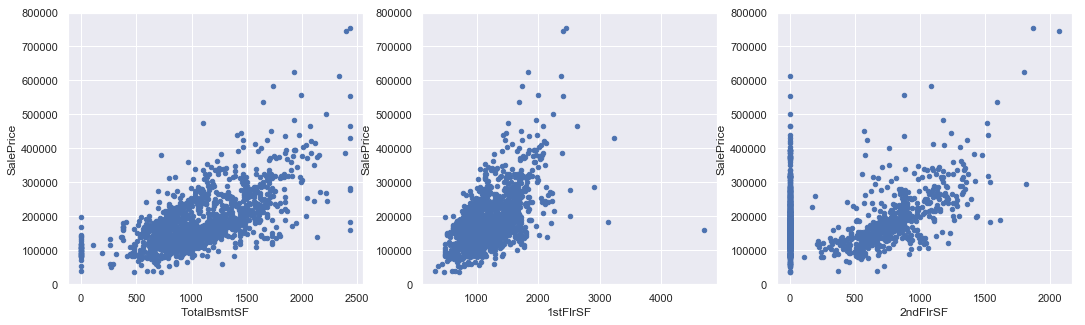

In [38]:
# We specially handle (TotalBsmtSF, 1stFlrSF)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
data_total = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data_total.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000), ax=axs[0])
data1 = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
data1.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,800000), ax=axs[1])
data2 = pd.concat([train['SalePrice'], train['2ndFlrSF']], axis=1)
data2.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0,800000), ax=axs[2]);

#### LotFrontage

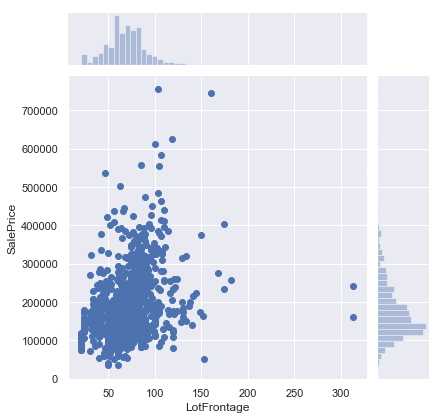

In [39]:
sns.jointplot(x="LotFrontage", y="SalePrice", data=train);

#### LotArea

12.195142125084478 202.5437927513529
-0.1378519937546653 4.693125425395519


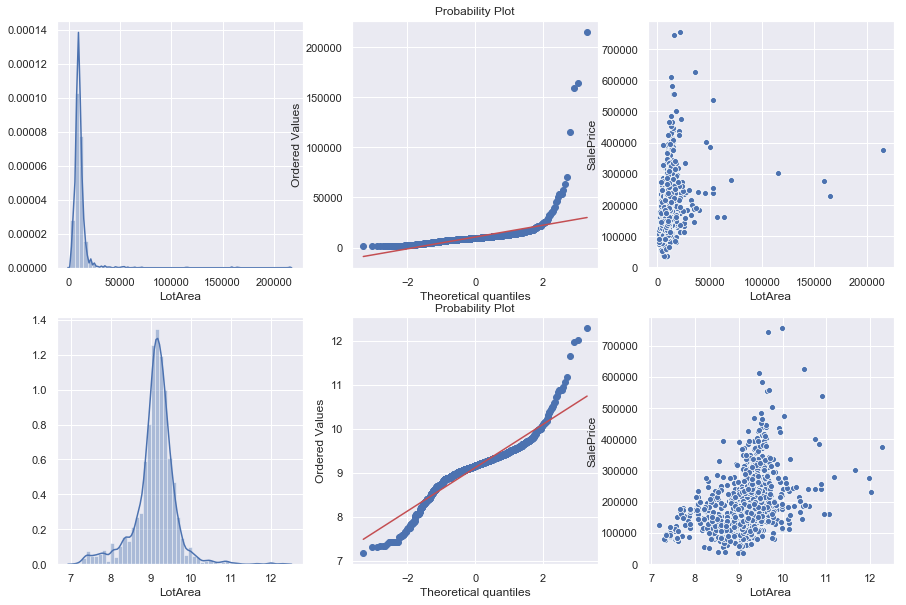

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
sns.distplot(train['LotArea'],ax=axs[0][0])
stats.probplot(train['LotArea'], plot=axs[0][1])
sns.scatterplot(train['LotArea'], train['SalePrice'], ax=axs[0][2])
print(skew(train['LotArea']), kurtosis(train['LotArea']))

sns.distplot(np.log(train['LotArea']), ax=axs[1][0])
stats.probplot(np.log(train['LotArea']), plot=axs[1][1])
sns.scatterplot(np.log(train['LotArea']), train['SalePrice'], ax=axs[1][2])
print(skew(np.log(train['LotArea'])), kurtosis(np.log(train['LotArea'])))

#### GrLivArea

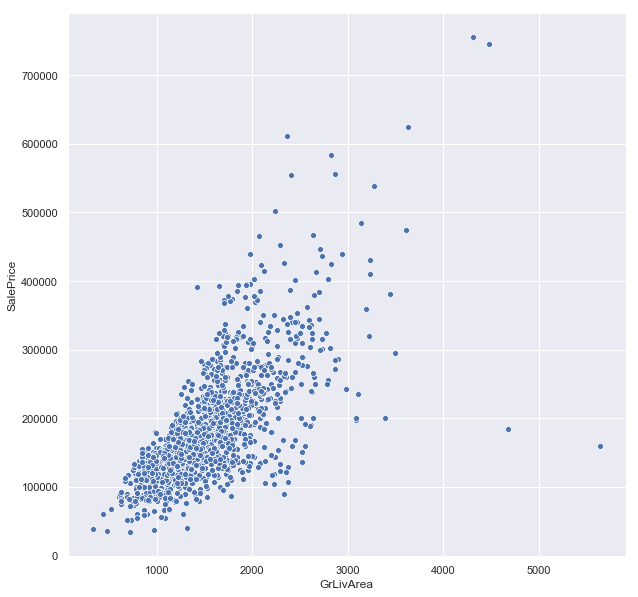

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train);

Skew:  1.365155954773434
Kurtosis:  4.874265760253215


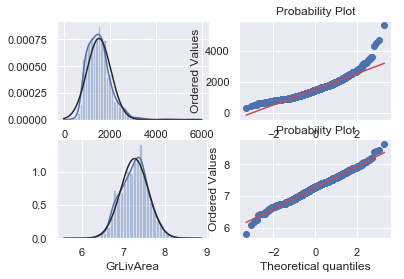

Skew:  -0.006987993304655894
Kurtosis:  0.27752902248462297


In [42]:
fig, axs = plt.subplots(2, 2)
sns.distplot(train['GrLivArea'], fit=stats.norm, ax=axs[0][0]);
stats.probplot(train['GrLivArea'], plot=axs[0][1]);
print("Skew: ", skew(train['GrLivArea']))
print("Kurtosis: ", kurtosis(train['GrLivArea']))

# High kurtosis -> very peaked
# Positive biased
# Deviates from Gaussian, similar to SalePrice

LogGrLivArea = np.log(train['GrLivArea'])
sns.distplot(LogGrLivArea, fit=stats.norm, ax=axs[1][0]);
stats.probplot(LogGrLivArea, plot=axs[1][1]);
plt.show()
print("Skew: ", skew(LogGrLivArea))
print("Kurtosis: ", kurtosis(LogGrLivArea))

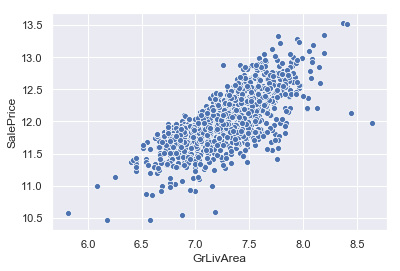

In [43]:
grlivar = np.log(train['GrLivArea'])
sp = np.log(train['SalePrice'])
sns.scatterplot(x=grlivar, y=sp);

# Homoscedastic - degree of similarity in variances across different random variables
# SalePrice performs same level of change within variable range of TotalSF

# "This graph shows that SalePrice performs the same level of change within variable 
# range of GrLivArea. In this case, we may take the logarithmic transformation for 
# GrLivArea to fit SalePrice well."

#### LotFrontage

In [49]:
train["LotFrontage"] = train["LotFrontage"].fillna(np.mean(train["LotFrontage"]))

2.382499177054863 21.76930784887213
0.3678334711730094 5.601298291613135


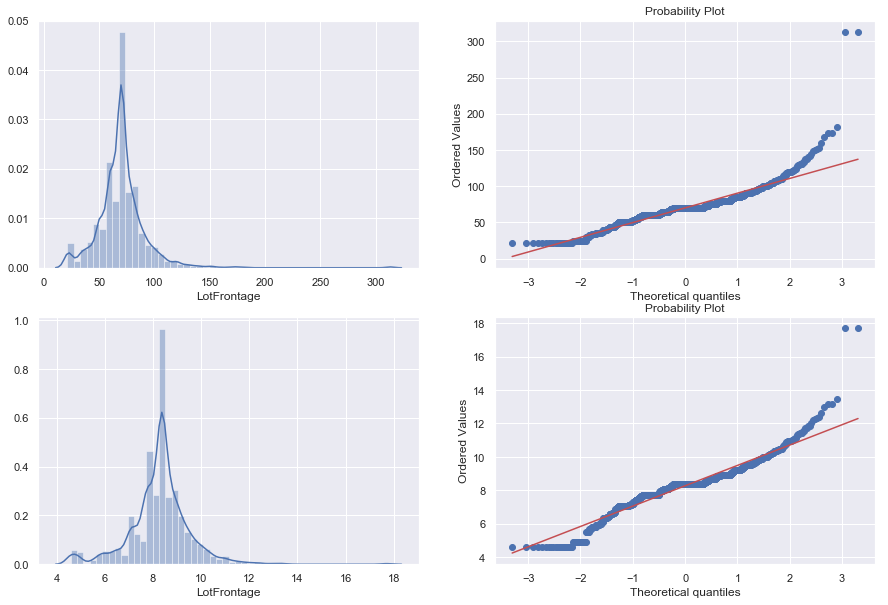

In [50]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
col = "LotFrontage"
xform = np.sqrt(train[col])
normskew, normkurt = skew(train[col]), kurtosis(train[col])
sqrtskew, sqrtkurt = skew(xform), kurtosis(xform)

print(normskew, normkurt)
print(sqrtskew, sqrtkurt)

sns.distplot(train[col], ax=axs[0][0])
stats.probplot(train[col], plot=axs[0][1])
sns.distplot(xform, ax=axs[1][0])
stats.probplot(xform, plot=axs[1][1]);

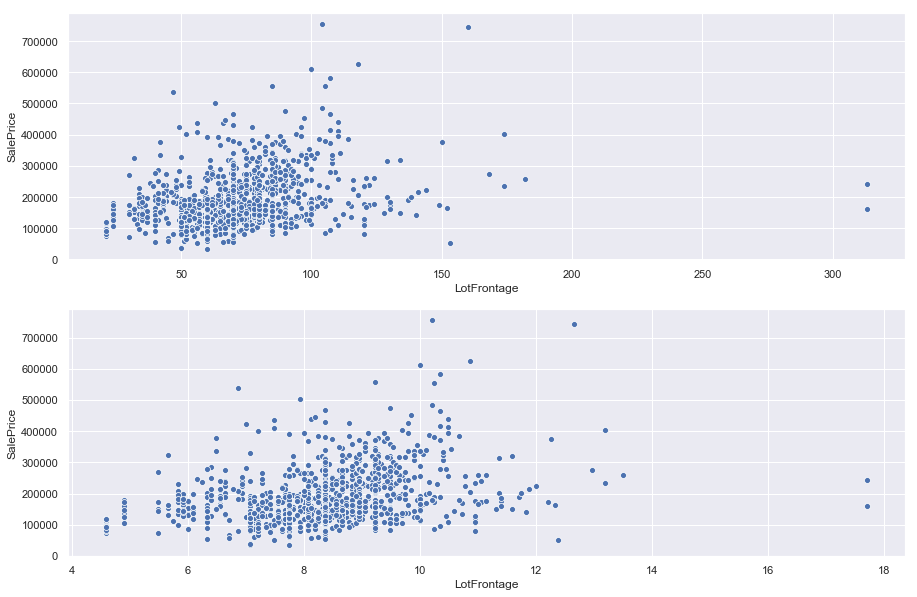

In [51]:
fig, axs = plt.subplots(2,1, figsize=(15,10))
sns.scatterplot(train['LotFrontage'], train['SalePrice'], ax=axs[0])
sns.scatterplot(np.sqrt(train['LotFrontage']), train['SalePrice'], ax=axs[1]);

# Analyze Interactions

#### TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF

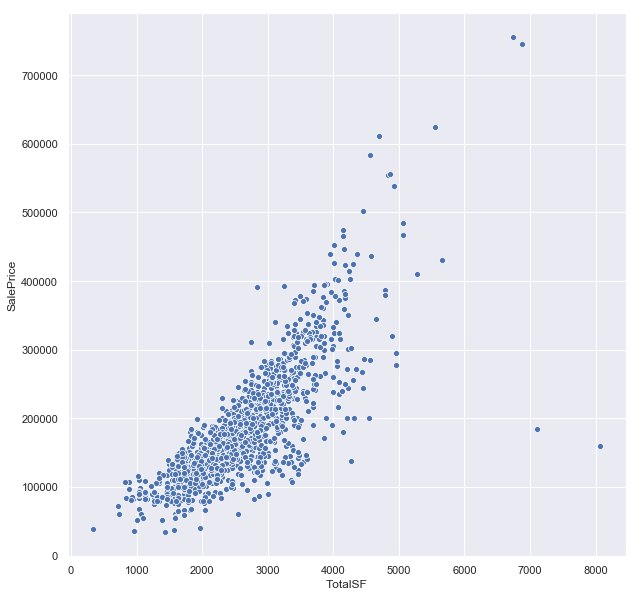

In [53]:
# Since TotalBsmtSF, 1stFlrSF, and 2ndFlrSF give info about the area of the house 
# and they have similar relationships with SalePrice, we sum them into a new interaction
# column called "TotalSF"
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
train['1stFlrSF'] = train['1stFlrSF'].fillna(0)
train['2ndFlrSF'] = train['2ndFlrSF'].fillna(0)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['1stFlrSF'] = test['1stFlrSF'].fillna(0)
test['2ndFlrSF'] = test['2ndFlrSF'].fillna(0)
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

plt.figure(figsize=(10,10))
sns.scatterplot(x='TotalSF', y='SalePrice', data=train);

Skew:  1.020077901242358
Kurtosis:  3.3550741999792404


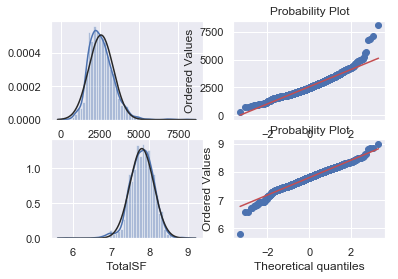

Skew:  -0.42585260078063425
Kurtosis:  1.7213092629040627


In [54]:
fig, axs = plt.subplots(2, 2)
sns.distplot(train['TotalSF'], fit=stats.norm, ax=axs[0][0]);
stats.probplot(train['TotalSF'], plot=axs[0][1]);
print("Skew: ", skew(train['TotalSF']))
print("Kurtosis: ", kurtosis(train['TotalSF']))

# High kurtosis -> very peaked
# Positive biased
# Deviates from Gaussian, similar to SalePrice

LogTotalSF = np.log(train['TotalSF'])
sns.distplot(LogTotalSF, fit=stats.norm, ax=axs[1][0]);
stats.probplot(LogTotalSF, plot=axs[1][1]);
plt.show()
print("Skew: ", skew(LogTotalSF))
print("Kurtosis: ", kurtosis(LogTotalSF))

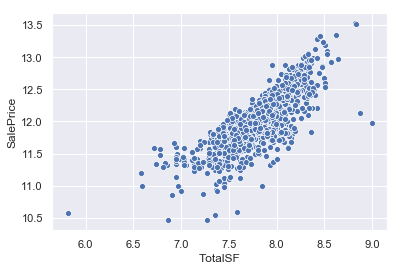

In [55]:
sf = np.log(train['TotalSF'])
sp = np.log(train['SalePrice'])
sns.scatterplot(x=sf, y=sp);

# Homoscedastic - degree of similarity in variances across different random variables
# SalePrice performs same level of change within variable range of TotalSF